In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json


In [16]:
df=pd.read_json("/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json",lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [17]:
del df['article_link'] 
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


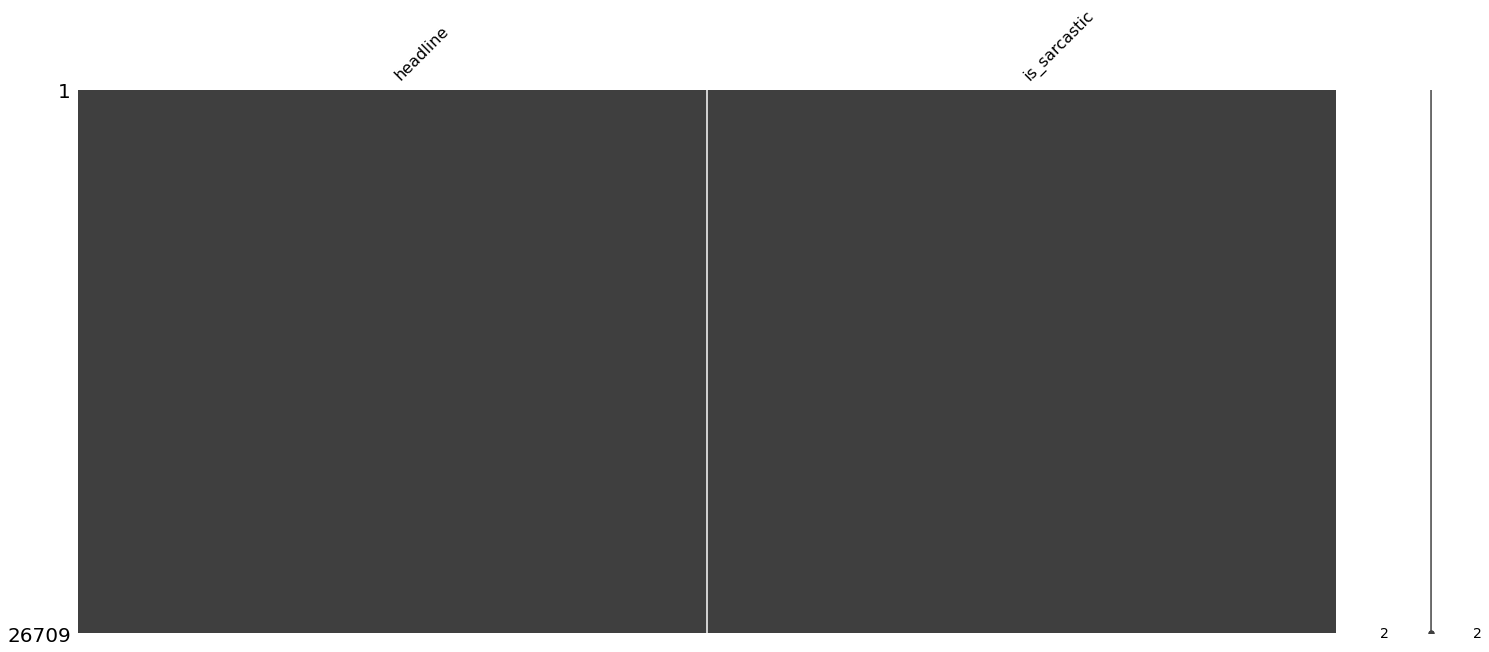

In [18]:
import missingno as msno
msno.matrix(df)

As we can see there are no missing values to handle so we will go ahead with EDA.

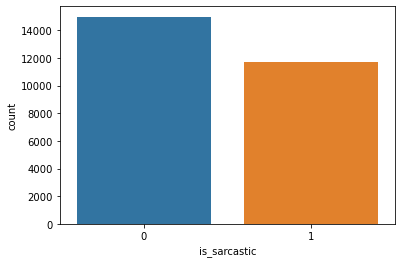

In [19]:
import seaborn as sns
sns.countplot(df['is_sarcastic'])

Here we can see dataset is almost balanced as both values have equal no of datasets.

# Data Cleaning

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')
corpus = []
for i in range(0, len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['headline'][i])
    text = text.lower()
    text = text.split()
    
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
corpus

['former versac store clerk sue secret black code minor shopper',
 'roseann reviv catch thorni polit mood better wors',
 'mom start fear son web seri closest thing grandchild',
 'boehner want wife listen come altern debt reduct idea',
 'j k rowl wish snape happi birthday magic way',
 'advanc world women',
 'fascin case eat lab grown meat',
 'ceo send kid school work compani',
 'top snake handler leav sink huckabe campaign',
 'friday morn email insid trump presser age',
 'airlin passeng tackl man rush cockpit bomb threat',
 'facebook reportedli work healthcar featur app',
 'north korea prais trump urg us voter reject dull hillari',
 'actual cnn jeffrey lord indefens',
 'barcelona hold huge protest support refuge',
 'nuclear bomb deton rehears spider man music',
 'cosbi lawyer ask accus come forward smear legal team year ago',
 'stock analyst confus frighten boar market',
 'bloomberg program build better citi got bigger',
 'craig hick indict',
 'courtroom sketch artist clear manga influe

In [22]:
words=[]
for word in corpus:
    words.append(word.split())
words
    

[['former',
  'versac',
  'store',
  'clerk',
  'sue',
  'secret',
  'black',
  'code',
  'minor',
  'shopper'],
 ['roseann', 'reviv', 'catch', 'thorni', 'polit', 'mood', 'better', 'wors'],
 ['mom',
  'start',
  'fear',
  'son',
  'web',
  'seri',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'want',
  'wife',
  'listen',
  'come',
  'altern',
  'debt',
  'reduct',
  'idea'],
 ['j', 'k', 'rowl', 'wish', 'snape', 'happi', 'birthday', 'magic', 'way'],
 ['advanc', 'world', 'women'],
 ['fascin', 'case', 'eat', 'lab', 'grown', 'meat'],
 ['ceo', 'send', 'kid', 'school', 'work', 'compani'],
 ['top', 'snake', 'handler', 'leav', 'sink', 'huckabe', 'campaign'],
 ['friday', 'morn', 'email', 'insid', 'trump', 'presser', 'age'],
 ['airlin', 'passeng', 'tackl', 'man', 'rush', 'cockpit', 'bomb', 'threat'],
 ['facebook', 'reportedli', 'work', 'healthcar', 'featur', 'app'],
 ['north',
  'korea',
  'prais',
  'trump',
  'urg',
  'us',
  'voter',
  'reject',
  'dull',
  'hillari'],
 ['actual', 

In [23]:
leng=[]
for word in words:
    leng.append(len(word))
print(max(leng)) 

30


In [24]:
from tensorflow.keras.preprocessing.text import one_hot

In [25]:
sent=[]
for i in range(len(df)):
    sent.append(df['headline'][i])
voc_size=10000
onehot_repr=[one_hot(words,voc_size)for words in sent] 
print(onehot_repr)

[[1675, 7935, 6195, 4794, 2307, 7853, 676, 904, 7096, 1929, 3389, 378], [4440, 7946, 7620, 4766, 2284, 1349, 2111, 6022, 6062, 714, 1929, 926, 7546, 7268], [6191, 2231, 1349, 4929, 2284, 6547, 291, 8193, 2085, 8531, 9170, 1254, 1349, 2628], [1809, 5245, 5742, 5079, 1349, 4123, 926, 6953, 2284, 1737, 4713, 3192, 8284, 1595], [4459, 7384, 1811, 3244, 2204, 2124, 8250, 4684, 4440, 7678, 1089, 1402], [1784, 4440, 4827, 6627], [4440, 6156, 952, 1929, 7345, 455, 8344, 3044], [136, 4776, 9170, 1898, 5635, 9798, 1349, 8470, 4662, 6961, 3207, 1929, 6766, 7786], [5508, 7955, 9587, 5022, 5602, 3172, 7712], [2379, 952, 4478, 8335, 5562, 2809, 1929, 4440, 2534], [3749, 817, 3454, 6920, 6899, 7178, 427, 4684, 6088, 1675], [3785, 272, 6995, 3498, 7685, 3757, 7546, 8800], [4298, 5955, 2658, 5125, 7546, 5143, 2830, 3152, 1349, 8768, 6587, 5070], [9505, 7812, 4565, 9547, 7860, 8215, 3132, 1929, 4396, 9834], [3494, 1872, 5865, 5912, 4684, 9259, 8996, 7836], [1873, 6088, 21, 3676, 3826, 1929, 3995, 6946, 

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout

In [27]:
sent_len=40
embedded_sent=pad_sequences(onehot_repr,padding='pre',maxlen=sent_len)
print(embedded_sent)

[[   0    0    0 ... 1929 3389  378]
 [   0    0    0 ...  926 7546 7268]
 [   0    0    0 ... 1254 1349 2628]
 ...
 [   0    0    0 ... 8695 7546 7031]
 [   0    0    0 ... 5385 8363 5537]
 [   0    0    0 ... 4440  153 5079]]


In [57]:
from tensorflow.keras import layers
from keras.layers import Bidirectional
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
dim=20
model=Sequential()
model.add(Embedding(voc_size,10,input_length=sent_len))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 5
history = model.fit(X, Y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/5
214/214 [==============================] - 4s 17ms/step - loss: 0.5955 - accuracy: 0.6562 - val_loss: 0.4684 - val_accuracy: 0.7829
Epoch 2/5
214/214 [==============================] - 3s 13ms/step - loss: 0.3770 - accuracy: 0.8521 - val_loss: 0.4097 - val_accuracy: 0.8313
Epoch 3/5
214/214 [==============================] - 3s 12ms/step - loss: 0.2923 - accuracy: 0.8957 - val_loss: 0.4014 - val_accuracy: 0.8319
Epoch 4/5
214/214 [==============================] - 2s 11ms/step - loss: 0.2373 - accuracy: 0.9153 - val_loss: 0.5057 - val_accuracy: 0.8259
Epoch 5/5
214/214 [==============================] - 2s 11ms/step - loss: 0.1974 - accuracy: 0.9363 - val_loss: 0.4806 - val_accuracy: 0.8250


In [40]:
Y=df['is_sarcastic']
X=pd.DataFrame(embedded_sent)

In [41]:
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: is_sarcastic, dtype: int64